
# Project: Investigating The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies released from 1960 to 2015 and was collected from The Movie Database (TMDb).
The attributes recorded are:

1. ID
2. IMDB id
3. Popularity
4. Budget
5. Revenue
6. Title
7. Cast
8. Homepage
9. Director
10. Tagline
11. Keywords
12. Overview
13. Runtime
14. Genres
15. Production Companies 
16. Release Date
17. Vote Count
18. Vote Average
19. Release year 
20. Adjusted Budget: which is the cost of production of the movie adjusted to account for inflation in dollars
21. Adjusted revenue : which is the income generated from the movie adjusted to account for inflation in dollars


### Question(s) for Analysis
1. Is the movie industry growing?
2. What is the average runtime of movies?
3. Does the run time of a movie affect its budget in any way?
5. Which genre of movies is most commonly produced and which is the most popular?
6. Which actors have been most succesful in their careers in the time span recorded?
6. Which attributes are most closely related to profitability of a movie?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling
In this section, I will load the data, inspect its quality and clean the data where necessary so that it is an apporpriate form to carry out my analysis.

### General Properties

In [3]:
# loading and inspecting data
df = pd.read_csv('tmdb-movies.csv')
df.head(2).T

,0,1
id,135397,76341
imdb_id,tt0369610,tt1392190
popularity,32.9858,28.4199
budget,150000000,150000000
revenue,1513528810,378436354
original_title,Jurassic World,Mad Max: Fury Road
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/
director,Colin Trevorrow,George Miller
tagline,The park is open.,What a Lovely Day.


In [4]:
df.shape

(10866, 21)

In [5]:
#inspecting number of entries and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# checking for duplicate rows
df.duplicated().sum()

1

In [7]:
#summary of descriptive properties of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# checking to see if some movie titles appear more than once
df.original_title.value_counts()

Hamlet                         4
The Black Hole                 3
Annie                          3
A Christmas Carol              3
Hercules                       3
                              ..
The Reflecting Skin            1
Stolen Lives                   1
Admission                      1
Babylon 5: In the Beginning    1
Amateur                        1
Name: original_title, Length: 10571, dtype: int64

In [9]:
#confirming that rows with the same original title do not refer to the same movie with only minute differences in attributes
df.query('original_title == "Hamlet"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",...,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,...,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07



### Data Cleaning
> There are 3 attributes that serve to identify the movie in the dataset: id, imdb_id and original_title. The title of the movie should be sufficent to serve as a unique identifier but some movies have the same title so a new column which contains both the imdb_id and the movie title is made.

Some columns are not needed for the analysis and are to be dropped. These are id, imdb id, original title, budget, revenue, homepage, tagline, overview, release date and keywords.

Budget and revenue are dropped because the adjusted budget and revenue give more comparable values making them more appropriate for analysis.

Release date is in the wrong format and contains some inconsistent dates but its not necessary to clean this as the release year attribute can be used instead so I dropped it.

Some movies have no information for budget or revenue and because these are not values that can be easily estimated, these rows will be dropped to maintain the quality of my analysis.
 

In [10]:
#CREATING A SINGLE COLUMN WITH A UNIQUE IDENTIFIER FOR MOVIES AND CONFIRMING THE ADDITION OF THE NEW COLUMN
df["id_title"]= df["imdb_id"].str.cat(df["original_title"], sep =", ")
df.head(2).T

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,0,1
id,135397,76341
imdb_id,tt0369610,tt1392190
popularity,32.9858,28.4199
budget,150000000,150000000
revenue,1513528810,378436354
original_title,Jurassic World,Mad Max: Fury Road
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/
director,Colin Trevorrow,George Miller
tagline,The park is open.,What a Lovely Day.


In [11]:
#DROPPING UNNECESSARY COLUMNS
dropped_columns = ['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'keywords', 'homepage', 'tagline', 'overview','release_date' ]
df.drop(dropped_columns, axis =1, inplace = True)
df.head()

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,id_title
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,"tt0369610, Jurassic World"
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,"tt1392190, Mad Max: Fury Road"
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,"tt2908446, Insurgent"
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,"tt2488496, Star Wars: The Force Awakens"
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,"tt2820852, Furious 7"


In [12]:
# TO REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace = True)

In [13]:
# REMOVING ROWS WITH A BUDGET OR REVENUE OF ZERO
df = df[df['budget_adj'] != 0]
df = df[df['revenue_adj'] != 0]
df.shape

(3854, 12)

In [14]:
#checking descriptive statistics for the cleaned data set
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
popularity              3854 non-null float64
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
id_title                3854 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


There are no more zero values skewing the data set.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will carry out my analysis in order to answer the questions which were posed earlier.

### 1. Is the movie industry growing?

The metrics I have chosen to evaluate the growth of the industry are the number of movies being produced, which gives a measure of capacity and size and the revenue generated yearly which will measure financial growth.

In [16]:
 # evaluating the number of movies released per year and storing in a pandas dataframe
movies_per_year = df.groupby('release_year')['id_title'].count()
movies = pd.DataFrame(movies_per_year)
movies.reset_index(inplace =True)
movies.rename(columns ={'id_title':'number_of_movies'},inplace =True)

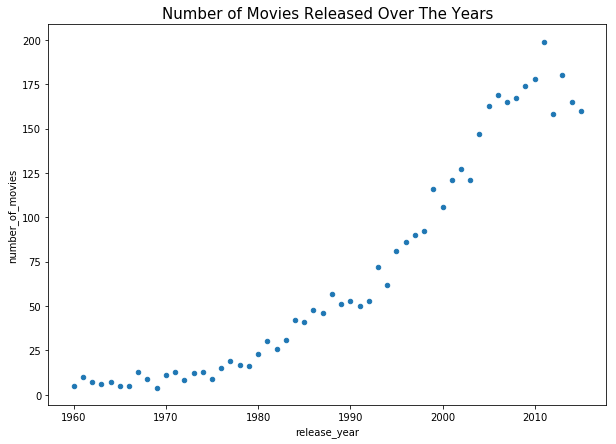

In [17]:
#plotting a scatter plot to show the relationship between release year and number of movies released
movies.plot(kind ='scatter', x ='release_year', y='number_of_movies', figsize=(10,7))
plt.title("Number of Movies Released Over The Years", fontsize =15);

The plot shows a postive correlation between the year and the number of movies released.

In [18]:
# Evaluating revenue generated from movies released per year
yearly_revenue = df.groupby('release_year')['revenue_adj'].sum()
yearly_revenue = pd.DataFrame(yearly_revenue)
yearly_revenue.reset_index(inplace = True)
yearly_revenue

,release_year,revenue_adj
0,1960,9.511497e+08
1,1961,2.463622e+09
2,1962,1.487318e+09
3,1963,1.256903e+09
4,1964,2.310241e+09
5,1965,3.170185e+09
6,1966,5.692623e+08
7,1967,4.783830e+09
8,1968,1.393100e+09
9,1969,1.365440e+09


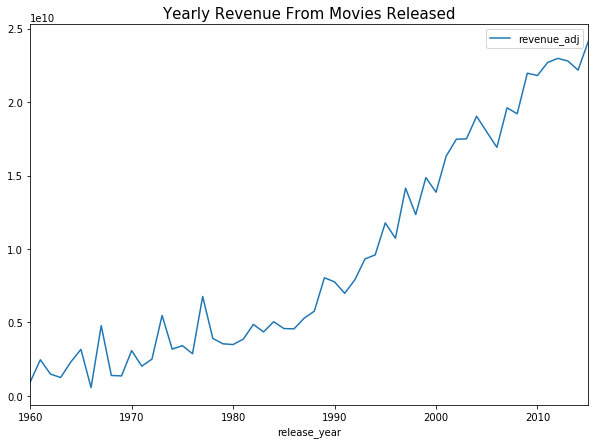

In [19]:
#line plot to show the trend in revenue generated from movie releases over the years
yearly_revenue.plot(kind = 'line' , x = 'release_year',y ='revenue_adj', figsize = (10,7))
plt.title("Yearly Revenue From Movies Released", fontsize =15);

The line plot shows that there has been an upward trend in revenue realized from movies over the years.

### 2. What is the average runtime of movies and does the length of a movie affect its budget?

In [20]:
#computing the average runtime of movies
average_runtime = df.runtime.mean()
average_runtime

109.22029060716139

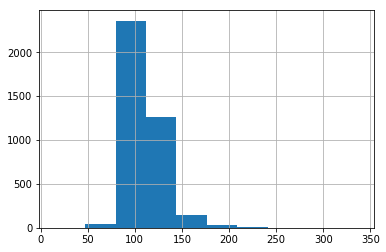

In [21]:
#distribution of runtime
df.runtime.hist();

The distribution is skewed to the right.

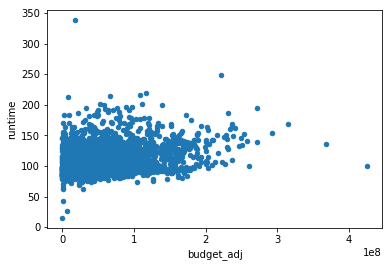

In [22]:
#scatter plot to show the correlation between runtime and budget
df.plot(kind ='scatter', x ='budget_adj', y ='runtime');

It does not look like there is any obvious correlation between the runtime of a movie and its budget.

### 3. Which Genres are the most commonly made and most popular?

In [23]:
# creating a function to concatenate all data from columns spearated by "|". split using "|" and count all values
def split_count(data, column):
    split_column_count = pd.Series(data [column].str.cat(sep = '|').split('|')).value_counts(ascending = False)
    return split_column_count

In [24]:
#calling the split_count function to count all occurrences of different genres
genre_count = split_count(df,'genres')
genre_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

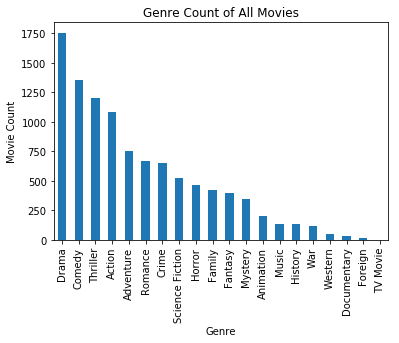

In [25]:
genre_count.plot(kind ='bar')
plt.title("Genre Count of All Movies")
plt.xlabel ("Genre")
plt.ylabel("Movie Count");

Drama movies seem to be the most commonly made.

In [26]:
#evaluating the mean popularity to slice dataset
mean_pop = df.popularity.mean()
mean_pop

1.1915540918526204

In [27]:
#creating popular movies dataset with movies that have above average popularity
popular_movies = df.query('popularity > {}'.format(mean_pop))
popular_movies.shape

(1199, 12)

In [28]:
#calling the split_count function for popular genres
popular_genres = split_count(popular_movies, 'genres')
popular_genres

Action             455
Drama              426
Comedy             381
Thriller           377
Adventure          367
Science Fiction    235
Fantasy            208
Family             193
Crime              189
Romance            179
Animation          116
Mystery             95
Horror              90
War                 41
Music               33
History             28
Western             13
dtype: int64

The most popular genre looks to be action. Let us visualize the top genres using a bar plot.

### 4. Which Actor has been the most successful in the recorded time period?

Again, we shall measure success in terms of how prolific an actor has been (which means the number of movies starred in) and how profitable their movies have been comparatively.

In [29]:
# calling the split count function to count actors in cast and limiting to the top 20 actors in terms of appearances
actor_count = split_count(df,'cast')
prolific_actors = actor_count[:20]
prolific_actors

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Brad Pitt             34
Tom Hanks             34
Harrison Ford         34
Morgan Freeman        34
Sylvester Stallone    34
Tom Cruise            33
Eddie Murphy          32
Denzel Washington     32
Liam Neeson           31
Julianne Moore        30
Owen Wilson           30
Gene Hackman          29
Robin Williams        29
Mark Wahlberg         29
dtype: int64

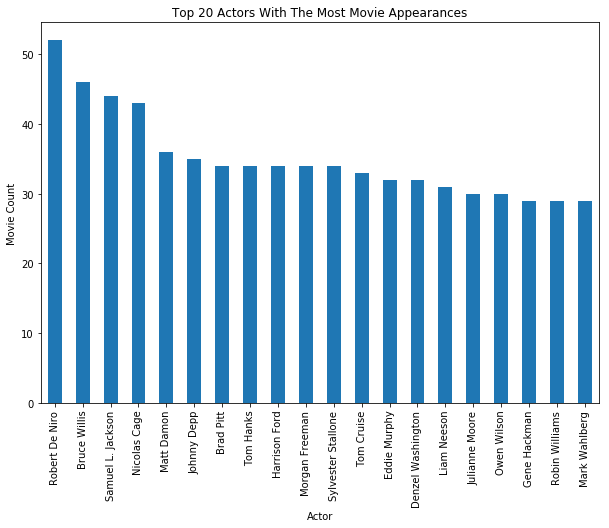

In [30]:
# visualizing the count of prolific actors
prolific_actors.plot(kind ='bar', figsize = (10,7))
plt.title("Top 20 Actors With The Most Movie Appearances")
plt.xlabel ("Actor")
plt.ylabel("Movie Count");

Robert De Niro And Bruce Willis appear to have made the most appearances in the movies recorded.

In [31]:
#estimating the profit generated from movies and creating a column for this in the database.
df['profit'] = df['revenue_adj']-df['budget_adj']
df.head().T

,0,1,2,3,4
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
runtime,124,120,119,136,137
genres,Action|Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Thriller,Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Fantasy,Action|Crime|Thriller
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Village Roadshow Pictures|Kennedy Miller Produ...,Summit Entertainment|Mandeville Films|Red Wago...,Lucasfilm|Truenorth Productions|Bad Robot,Universal Pictures|Original Film|Media Rights ...
vote_count,5562,6185,2480,5292,2947
vote_average,6.5,7.1,6.3,7.5,7.3
release_year,2015,2015,2015,2015,2015
budget_adj,1.38e+08,1.38e+08,1.012e+08,1.84e+08,1.748e+08


In [32]:
df.profit.mean()

92824697.2230982

In [33]:
df.profit.max()

2750136650.919176

Taking the average profit and maximum profit made from the movies into consideration, I will set 200 million as the pass mark for highly profitable movies.

In [34]:
profitable_movies = df.query('profit > 200000000')
profitable_movies.shape

(544, 13)

In [35]:
# calling the split count function to count actor appearances in the most profitable movies
bankable_actors = split_count(profitable_movies,'cast')
top_20_bankable_actors = bankable_actors[:20]
top_20_bankable_actors

Tom Cruise               16
Tom Hanks                15
Robin Williams           13
Bruce Willis             13
Dustin Hoffman           12
Harrison Ford            12
Will Smith               11
Samuel L. Jackson        10
Gary Oldman              10
Ben Stiller              10
Julia Roberts            10
Mel Gibson                9
Brad Pitt                 9
Leonardo DiCaprio         9
Emma Watson               9
Sylvester Stallone        9
Sean Connery              9
Rupert Grint              8
Jim Carrey                8
Arnold Schwarzenegger     8
dtype: int64

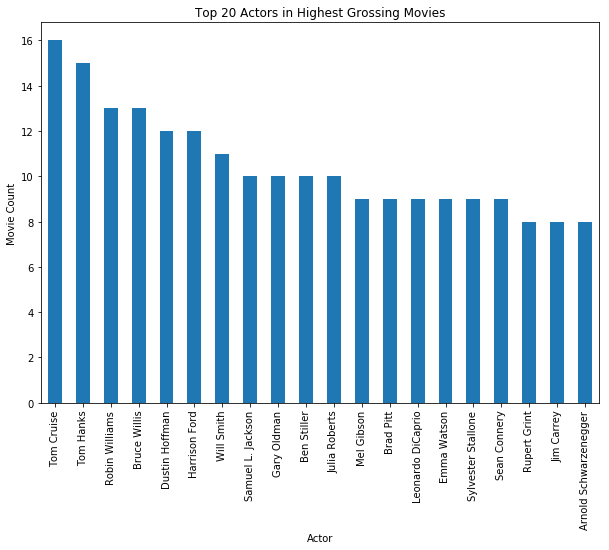

In [36]:
#illustrating with a bar plot
top_20_bankable_actors.plot(kind ='bar', figsize =(10,7))
plt.title("Top 20 Actors in Highest Grossing Movies")
plt.xlabel ("Actor")
plt.ylabel("Movie Count");

Tom Cruise and Tom Hanks are topping the list of actors whose movies have made relatively high profits

### 5. Which attributes are most closely related to profitabilty?

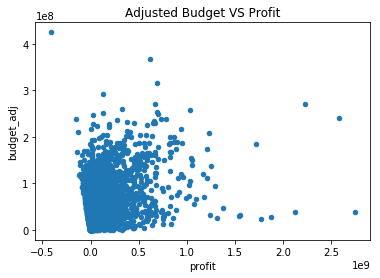

In [37]:
df.plot(kind ='scatter', x = 'profit', y ='budget_adj', title ="Adjusted Budget VS Profit");

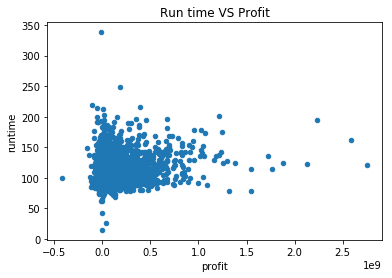

In [38]:
df.plot(kind ='scatter', x = 'profit', y ='runtime', title ="Run time VS Profit");

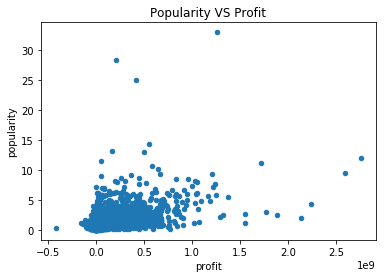

In [39]:
df.plot(kind ='scatter', x = 'profit', y ='popularity', title ="Popularity VS Profit");

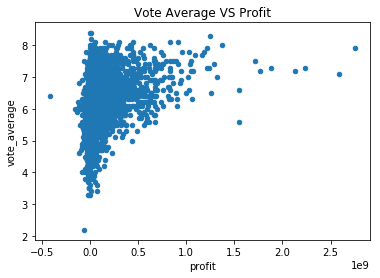

In [40]:
df.plot(kind ='scatter', x = 'profit', y ='vote_average', title = "Vote Average VS Profit");

<a id='conclusions'></a>
## Conclusions
 From the analysis carried out, we can see that:
1. There has been a noticeable increase in both the number of movies released and the revenue generated from these movies over the years. Thus, it is safe to say that the movie industry has seen significant growth over the past 50 years.

2. The average run time of movies is 109 minutes. Movies tend to run a bit longer rather than shorter with the most movies having a duration between 80 and 120 minutes. The length of movies showed no obvious correlation to the budget which tells us that shorter movies are not necessarily cheaper to make and vice versa.

3. The 3 genres that movies most commonly fit into are drama, comedy, thriller. However, the genre of movies that was the most popular was action, despite being only the fourth most commonly made.

4. The top five actors that had appeared in the most movies were Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicholas Cage and Matt Damon. However, these could be because they are older actors that have been in the business for a longer time within the given time frame and does not necessarily mean that they are employed more often than the other actors the list. An estimation of movies made per year would capture this more accurately. Surprisingly, only one of these actors (Bruce Willis) made the list of the top 5 actors whose movies have made the most profit collectively. This list was topped by Tom Cruise, Tom Hanks, Robin Williams, Bruce Willis and Harrison Ford. Again this might not be strictly accurate because might have just been lucky to have only extremely high grossing movie and this does not necessarily mean that their movies are generally associated with higher profits. Other actors that ranked in the top 20 considering both estimates were Tom Cruise, Tom Hanks, Harrison Ford, Samuel L.Jackson, Matt Damon, Brad Pitt, and Sylvester Stallone. 

** I could not help but notice that both lists were almost exclusively populated by men (although this cannot be confirmed without entries for their gender) and this leads me to think that women might be under represented in the movie industry or might not be as well paid. This is something worth exploring for more insight.

5. Budget, popularity and vote_average showed some positive correlation with profits which leads me to speculate that movies that have more invested in them tend to make more money. This does not mean that a higher budget necessarily causes a higher profit as there a lot of other factors that go into the success of a movie. Also, movies that do well commercially seem to be a bit more popular and receive more favorable ratings from viewers.





## Limitations
1. Almost two thirds of the data set did not values recorded for budget and/or revenue. I had to remove those rows which led to a much smaller sample.Therefore, the conclusions drawn from this sample set might not necessarily reflect actual trends in the whole data set.
2. Most of the variables in the data were qualititative which limits the statistical methods that can be used to find correlations.
3. A lot of other factors which might also contribute to the financial success of movies, such as advertising or whether the movie was released in theaters or not are not included and this greatly limits any deductions we might make concering the success of a movie.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0